Аналитический отчет по ежемесячной выручке
year_month  revenue
   2025-02   862.85
   2025-03  3312.21
   2025-04  4716.68




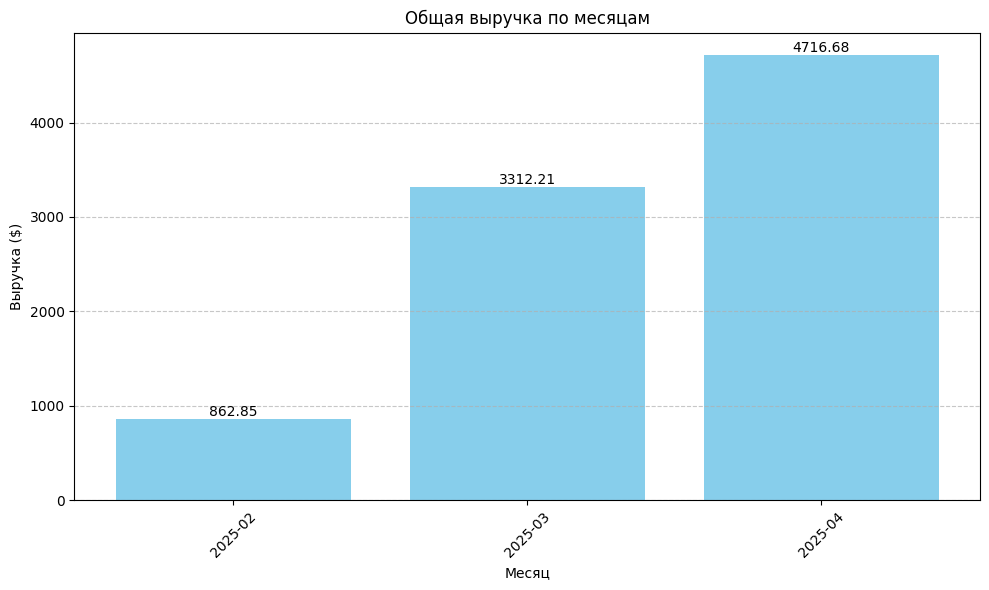


Дополнительная статистика:
Всего месяцев в данных: 3
Средняя месячная выручка: $2963.91
Максимальная выручка: $4716.68 (2025-04)
Минимальная выручка: $862.85 (2025-02)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV
df = pd.read_csv('sales.csv')

# Преобразование даты в формат datetime и извлечение месяца
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')  # Группировка по месяцу
df['year_month'] = df['date'].dt.strftime('%Y-%m')  # Для красивого отображения

# Расчет выручки для каждой продажи
df['revenue'] = df['price'] * df['quantity']

# Группировка по месяцу и расчет общей выручки
monthly_revenue = df.groupby('year_month')['revenue'].sum().reset_index()
monthly_revenue['revenue'] = monthly_revenue['revenue'].round(2)

# Создание отчета
print("Аналитический отчет по ежемесячной выручке")
print("="*40)
print(monthly_revenue.to_string(index=False))
print("\n")

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_revenue['year_month'], monthly_revenue['revenue'], color='skyblue')

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Общая выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Дополнительная статистика
print("\nДополнительная статистика:")
print(f"Всего месяцев в данных: {len(monthly_revenue)}")
print(f"Средняя месячная выручка: ${monthly_revenue['revenue'].mean():.2f}")
print(f"Максимальная выручка: ${monthly_revenue['revenue'].max():.2f} ({monthly_revenue.loc[monthly_revenue['revenue'].idxmax(), 'year_month']})")
print(f"Минимальная выручка: ${monthly_revenue['revenue'].min():.2f} ({monthly_revenue.loc[monthly_revenue['revenue'].idxmin(), 'year_month']})")

<ipython-input-3-612ffc37e09c>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = monthly_products.groupby('year_month').apply(


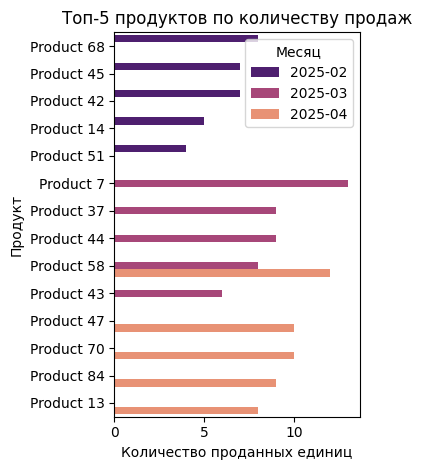

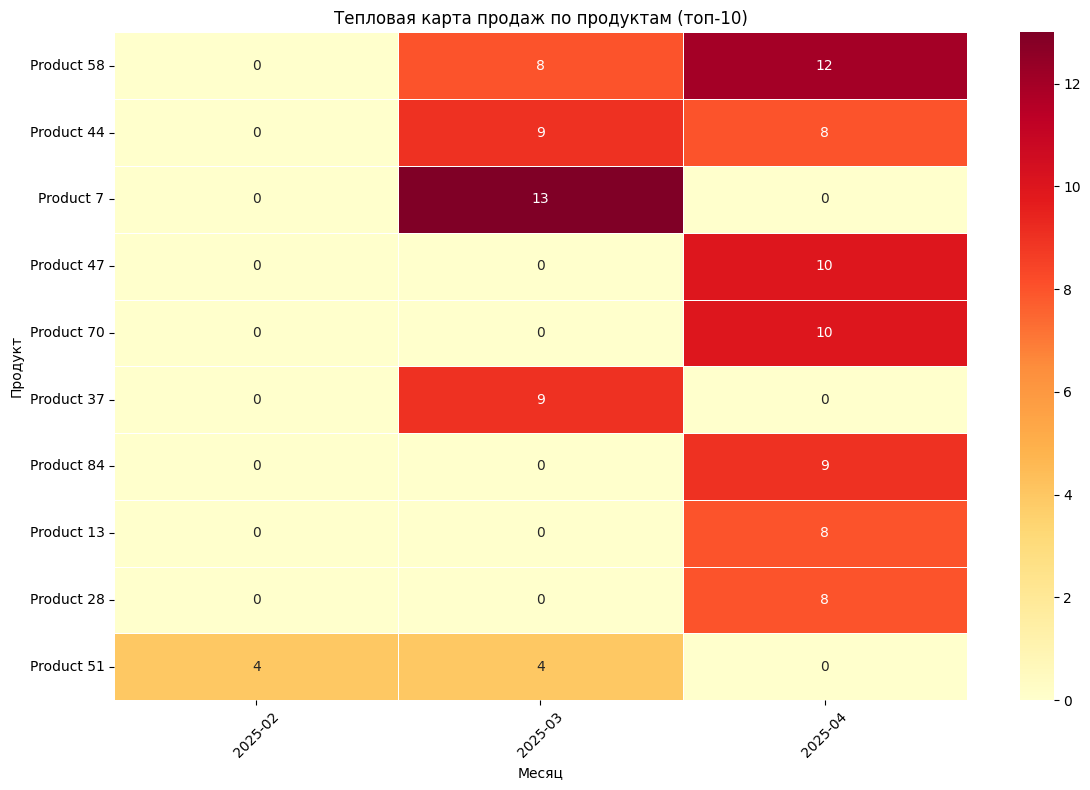

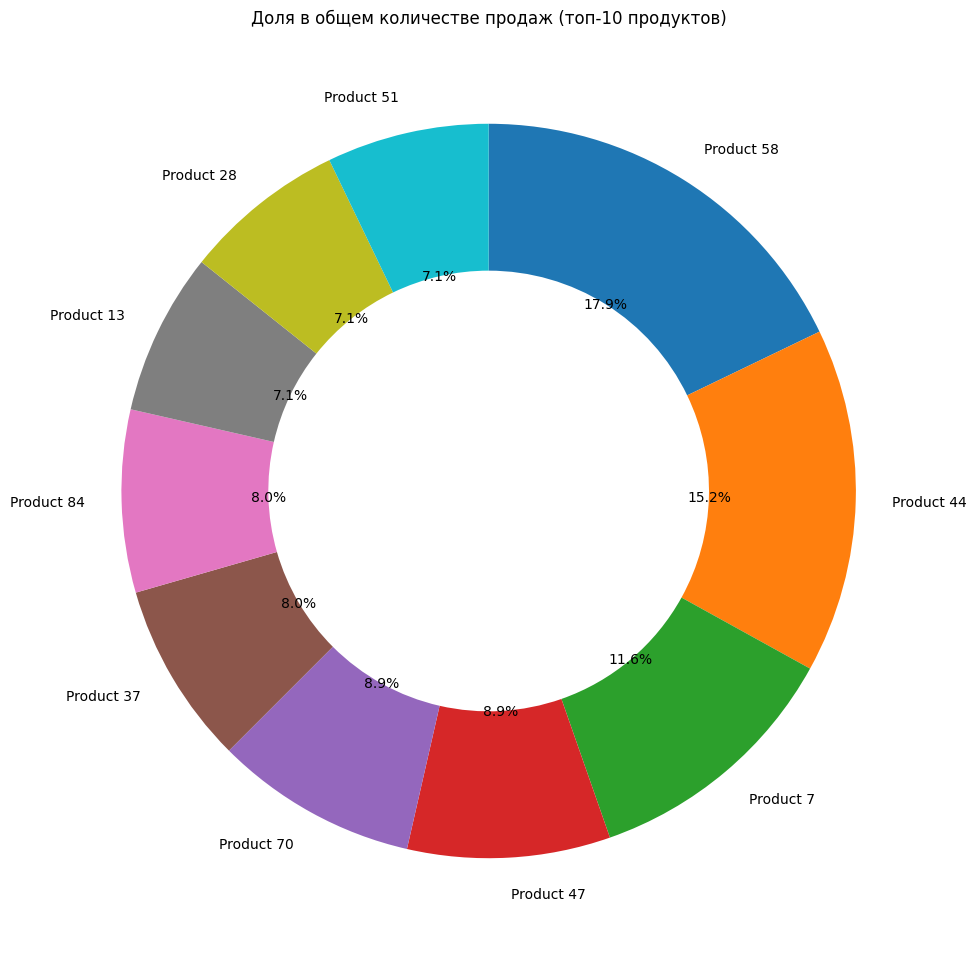

In [3]:
import seaborn as sns
# Топ-5 продуктов по количеству продаж по месяцам
plt.subplot(1, 2, 2)  # Второй график

# Группировка данных
monthly_products = df.groupby(['year_month', 'item']).agg({
    'quantity': 'sum',
    'revenue': 'sum'
}).reset_index()

# Для каждого месяца берем топ-5 продуктов по количеству
top_products = monthly_products.groupby('year_month').apply(
    lambda x: x.nlargest(5, 'quantity')).reset_index(drop=True)

# Визуализация
sns.barplot(x='quantity', y='item', hue='year_month',
            data=top_products, palette='magma')

plt.title('Топ-5 продуктов по количеству продаж')
plt.xlabel('Количество проданных единиц')
plt.ylabel('Продукт')
plt.legend(title='Месяц')
plt.tight_layout()

plt.show()

# 3. Дополнительная визуализация: Тепловая карта продаж по продуктам и месяцам
plt.figure(figsize=(12, 8))

# Создаем сводную таблицу
heatmap_data = df.pivot_table(
    index='item',
    columns='year_month',
    values='quantity',
    aggfunc='sum',
    fill_value=0
)

# Берем топ-10 продуктов по общему количеству
top_items = heatmap_data.sum(axis=1).nlargest(10).index
heatmap_data = heatmap_data.loc[top_items]

# Рисуем тепловую карту
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g', linewidths=.5)
plt.title('Тепловая карта продаж по продуктам (топ-10)')
plt.xlabel('Месяц')
plt.ylabel('Продукт')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Круговая диаграмма распределения продаж по продуктам
plt.figure(figsize=(10, 10))

# Группируем данные по продуктам
product_sales = df.groupby('item')['quantity'].sum().nlargest(10)

# Создаем круговую диаграмму
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%',
        startangle=90, counterclock=False, wedgeprops={'width':0.4})
plt.title('Доля в общем количестве продаж (топ-10 продуктов)')
plt.tight_layout()
plt.show()